In [1]:
import numpy as np
import pandas as pd
import os

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from neuromaps.images import load_data, load_gifti, annot_to_gifti, relabel_gifti, construct_shape_gii
from neuromaps.datasets import fetch_annotation
from neuromaps.resampling import resample_images
from neuromaps.nulls import alexander_bloch, burt2020
from neuromaps.parcellate import Parcellater
from scipy.stats import pearsonr
from neuromaps import transforms 
from neuromaps.stats import compare_images
from neuromaps.nulls import hungarian

In [5]:
base_path = os.path.dirname(os.getcwd())

dk_mni = f'{base_path}/parcellations/atlas-desikankilliany_space-MNI_res-1mm.nii.gz'
parcellater_mni = Parcellater(dk_mni, 'MNI152')

In [ ]:
ucbj = fetch_annotation(source='finnema2016')
parcellated_ucbj = parcellater_mni.fit_transform(ucbj, space='MNI152', ignore_background_data=True)

In [17]:
svt1 = f'{base_path}/test_subject/mrtm2_sm6/bp.nii.gz'
parcellated_svt1 = parcellater_mni.fit_transform(svt1, space='MNI152', ignore_background_data=True)

Text(2.8, 1, 'correlation r = 0.553')

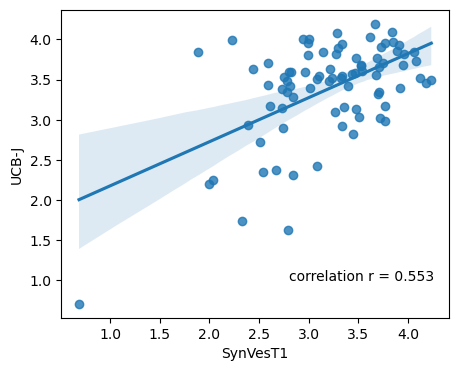

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 4))
rho = np.round(pearsonr(parcellated_svt1[0], parcellated_ucbj[0])[0], 3)

df = pd.DataFrame({'SynVesT1':parcellated_svt1[0], 'UCB-J':parcellated_ucbj[0] })
sns.regplot(df, x='SynVesT1', y='UCB-J'); 
text = f'correlation r = {rho}'
ax.annotate(text, xy=(2.8,1))


In [35]:
?ax.annotate


Signature:
ax.annotate(
    text,
    xy,
    xytext=None,
    xycoords='data',
    textcoords=None,
    arrowprops=None,
    annotation_clip=None,
    **kwargs,
)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x, y)* to place the text at. The coordinate system
    is determined by *textcoords*.

xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

  